In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('survey lung cancer.csv')
df = df.drop(labels='GENDER', axis=1)
df = df.replace('YES',1)
df = df.replace('NO',0)
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [3]:
df.groupby('ALCOHOL CONSUMING').mean()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
ALCOHOL CONSUMING,,,,,,,,,,,,,,
1,62.131387,1.591241,1.729927,1.591241,1.591241,1.503650,1.773723,1.364964,1.408759,1.467153,1.737226,1.474453,1.372263,0.766423
2,63.104651,1.540698,1.441860,1.424419,1.430233,1.505814,1.593023,1.709302,1.674419,1.668605,1.563953,1.465116,1.703488,0.959302


In [4]:
df.groupby('ANXIETY').var()

,AGE,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
ANXIETY,,,,,,,,,,,,,,
1,83.767323,0.251362,0.207373,0.240218,0.251529,0.182907,0.232258,0.228488,0.232258,0.215165,0.207373,0.175953,0.238793,0.144784
2,51.000806,0.231092,0.127875,0.239368,0.251634,0.244461,0.250955,0.250106,0.250955,0.250573,0.246499,0.205415,0.251634,0.072320


In [5]:
df.groupby('SMOKING').sum()

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
SMOKING,,,,,,,,,,,,,,
1,8567,213,190,206,214,228,210,220,214,223,217,196,201,115
2,10799,272,273,258,251,289,271,261,267,265,290,258,280,155


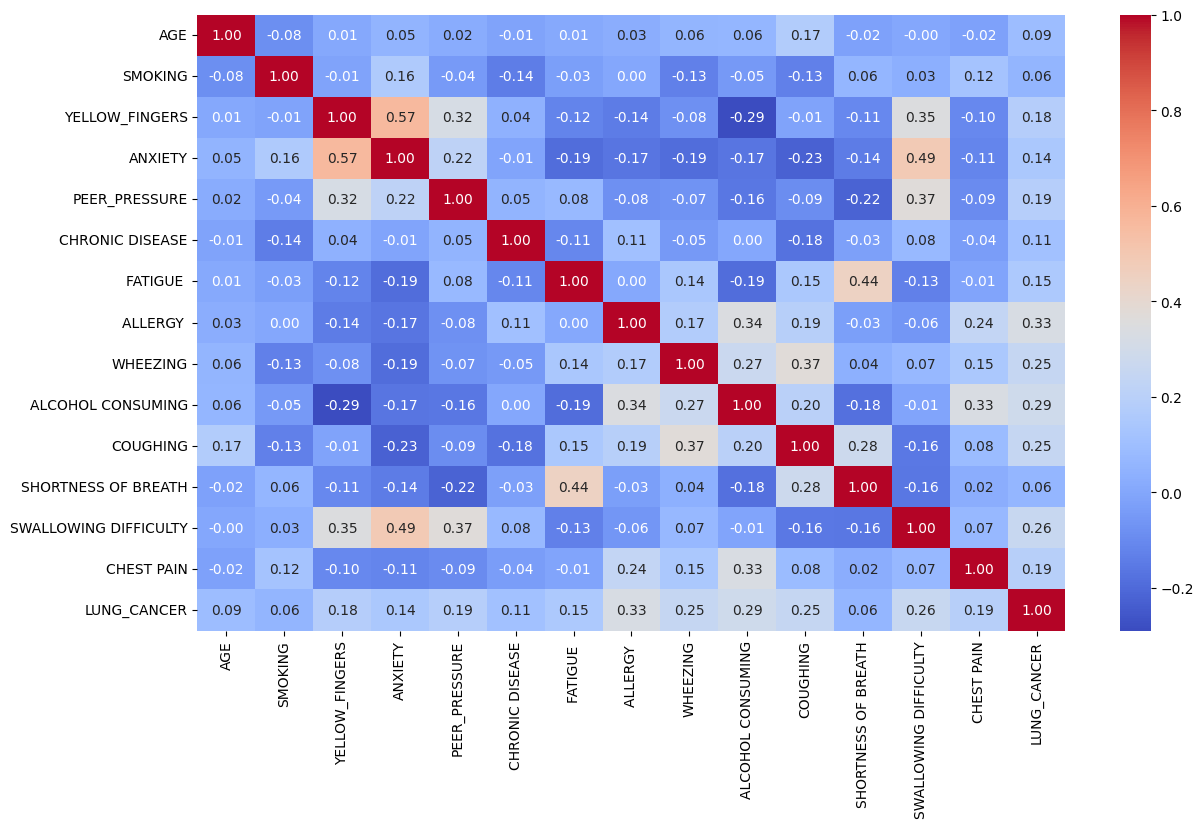

In [6]:
fig = plt.figure(figsize=(14, 8))
corr = df.corr()
seaborn.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

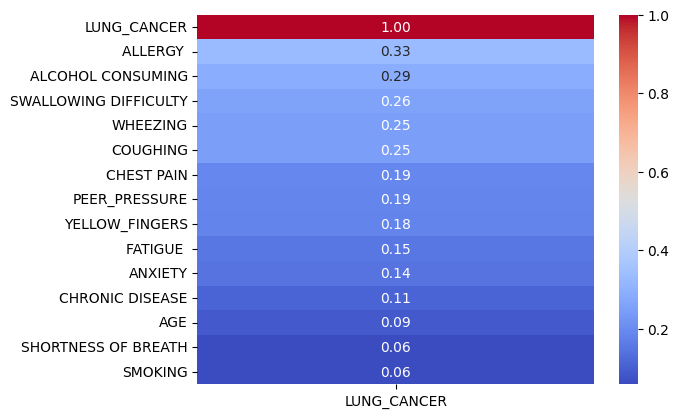

In [7]:
corr_lungcancer = corr['LUNG_CANCER'].sort_values(ascending=False).to_frame()
seaborn.heatmap(corr_lungcancer, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [8]:
y = df.LUNG_CANCER
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.98      0.91      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.89      0.82        62
weighted avg       0.93      0.90      0.91        62

